<h1 align="center">UW CNC Fall Hackathon </h1>  
<h3 align="center"> Dec 4, 2024 </h3>   
<h3 align="center"> mapping mesoscale connectivity between the frontal cortex and thalamus</h3> 
    
    

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
**Overview:** In this notebook, we will analyze the connectivity between thalamic subregions and the frontal cortex using a 3D light sheet microscopy dataset of whole mouse brains. 
While this tutorial focuses on thalamic inputs to the frontal cortex, the dataset contains connections between the frontal cortex and other brain regions that have yet to be thoroughly explored.    
    
**Dataset:**  
    
**Experiment:** Retrograde viruses were injected into frontal cortex to induce the expression of nuclear-localized fluorophores in host cells in frontal cortex and their presynaptic partners across the brain. Each brain dataset is multiplexed and received multiple viral injections, resulting in multiple color channels highlighting different connections. Whole brains were imaged using a light sheet microscope (SmartSPIM). 
    
**Image Processing:** The image tiles were stitched together into a 3D volume then transformed into a reference brain template called the Common Coordinate Framework (CCF). A cell detection model was applied to the images, yielding spatial coordinates for each detected cell. *Note that the cell detection model was optimized for the thalamus.  
        
**Goal:** This tutorial will show you how to:  
    1. analyze connectivity across brain regions  
    2. work with 3D volumetric microscopy data of whole mouse brains 



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### Section 1: Import packages and load data<br>
    
    

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nrrd
from pathlib import Path


from load_data import load_data
import brainglobe_atlasapi as atlasapi
from brainglobe_atlasapi import BrainGlobeAtlas

output_dir = '../scratch/'

%matplotlib inline

In [3]:
atlasapi.config.write_config_value('brainglobe_dir', '/data/.brainglobe') # points to allen mouse atlases pre-loaded in data folder 

atlas = BrainGlobeAtlas('allen_mouse_25um', check_latest = False) # load CCF mouse brain atlas, 25um resolution 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: In general, keep the imports as minimal as possible. Let's make sure we really need all of these.

It might also be good to separate generic imports from things we've written ourselves, or that are more specific. E.g. brain and BrainGlobeAtlas. Might be good to note what they are ... (might also be overkill)
    
Let's add the atlas instantiation here maybe? Or at least point brainglobe to the right data here?

Let's discuss whether we really need seaborn here. I'm generally not a big fan on seaborn plots because they do a lot of statistics in the back without users being aware. There are times when it's not really important, but my default is to avoid them. 
    

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### Break:  
we will start by importing metadata as a df and unpack some of the experimental information

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### Load data for a single brain 
      
load_data will pull the relevant data from the files for a given Mouse ID.  

Here, you can see which channels went through each stage of processing.  
(raw image channels > cell segmentation model applied > transformation to CCF space) 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: Can we add proper docstrings to the functions in load_data to help users understand what the functions do, what inputs are, what outputs are, etc?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: It might help to start with picking a brain - what do we know about this brain? Why are we picking it? This might work best starting with metadata, so we can add that shortly, but rather than brain out of a hat, let's motivate why we are looking at this brain.

In [4]:
mouse_ID = '698035' 
x = load_data(mouse_ID, level = 3)

Loading data from ../data/SmartSPIM_698035_2023-10-24_18-38-40_stitched_2023-10-28_20-52-51/image_tile_fusing/OMEZarr
Found the following channels: ['445', '488', '561', '639']
Found cell segmentations in the following channels: ['445', '488', '561']
Found CCF aligned quantifications in the following channels: ['445', '488', '561']
Grabbing volumes for level: 3


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: We need to unpack what this information means. Specifically the level. The rest I'm able to figure out based on my existing knowledge. I'm guessing the level is some sort of CCF level? But since we don't really have meaningful levels for the CCF (e.g. there is no consistent hierarchy structure across the brain) I have no idea how to think about this.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

We can quickly look at the slices in each channel using `plotSlice` or all channels together in `plotBlend`.  
      
(to do: might be worth just putting the plotSlice and plotBlend code in here and then resorting the parameter order so they are the same)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: What does the level do in these plots? Changing the level doesn't appear to change the plot

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: Might be useful to have a plot at a different orientation or different section just to demo changing parameters and what they do.

In [ ]:
x.plotSlice(ch = "561", plane="coronal", level = 3, section = 3600) 
# remove level 
# find range of sections (shape of volume) 
# maybe remove this in favor of browsing data in neuroglancer or point to neuroglancer here 

Grabbing volumes for level: 3
Plotting coronal axis, secion: 3600 (level 3 index: 450)


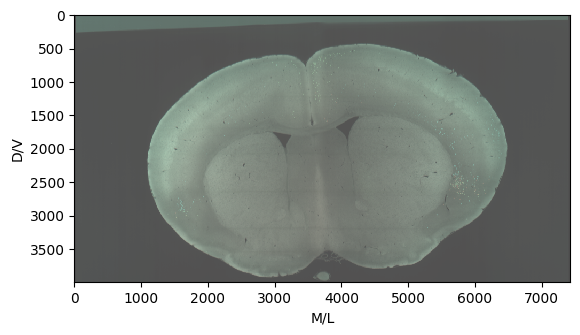

In [7]:
x.plotBlend(plane = "coronal", section = 3600, level = 3, ticks = True)
# remove 

In [ ]:
# get neuroglancer links in metadata df 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

not sure if we need orientVol and getInjectionSite. if so, provide context here. 
______ 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: I don't understand what the next couple cells are doing or why we would do them?

In [8]:
x.orientVol('561', plane = "coronal", returnLabels = False)

# remove ? 

dask.array<transpose, shape=(1282, 499, 929), dtype=uint16, chunksize=(128, 128, 128), chunktype=numpy.ndarray>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

not sure if we need this. if so, provide context here



Grabbing volumes for level: 3


/opt/conda/lib/python3.10/site-packages/dask/array/core.py:1713: FutureWarning: The `numpy.quantile` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


dask.array<clip, shape=(120, 120, 120), dtype=float64, chunksize=(115, 63, 120), chunktype=numpy.ndarray>

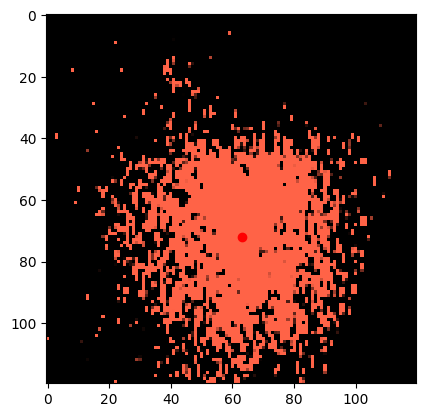

In [9]:
x.getInjectionSite('561', level = 3, plane = 'sagittal', span = 60, showPlot = True)

# remove, will add injection site into metadata 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: What am I looking at in this figure? Can we label the axes? Also what are the parameters we're passing in. What does span mean? What are my level options? What should I be able to learn from looking at this image?

Grabbing volumes for level: 4


/opt/conda/lib/python3.10/site-packages/dask/array/core.py:1713: FutureWarning: The `numpy.quantile` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


dask.array<clip, shape=(120, 120, 120), dtype=float64, chunksize=(87, 72, 99), chunktype=numpy.ndarray>

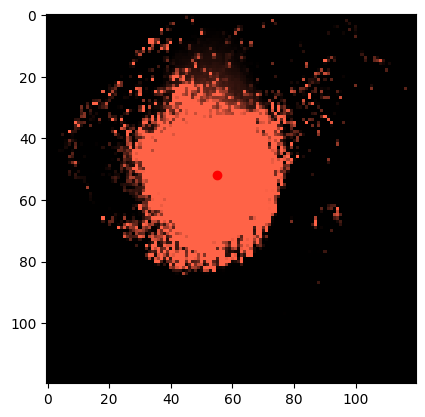

In [10]:
x.getInjectionSite('561', level = 4, plane = 'sagittal', span = 60, showPlot = True)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: E.g. here I changed the level and this figure looks different in a way I didn't expect. So now I don't think that level means what I thought it meant. (And don't need to keep this, it was me testing)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Neuroglancer link to browse through the data in 3D 
    
(note: we won't use this once we can upload metadata into a df)

In [10]:
x.getNGLink()

# point to cleaned up links in metadata

https://aind-neuroglancer-sauujisjxq-uw.a.run.app#!s3://aind-open-data/SmartSPIM_698035_2023-10-24_18-38-40_stitched_2023-10-28_20-52-51/neuroglancer_config.json


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The `getCellsCCF` function will load the spatial coordinates of the detected cells in each channel. Note that these coordinates are transformed into CCF space.<br><br>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: Tell us something about what the cellLocs data object is. Dictionary where they keys are the channel names and the values are an array of shape NxM where rows are unique cells and columns are which? coordinates? ap,ml,dv? ml,ap,dv?
(I think this might be better as a dataframe or xarray object in the future where things can be appropriately identified... but that's for later)

<p>Exploring the shape of these would be useful. How many cells were identified in the 445 channel? How many cells were identified in the 561 channel? These can even be "tasks" for people to solve that you can then show them to drive just a little thought.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: Is there a reason we only look at two of the channels here when it says 3 were quantified?

In [11]:
cellLocs = x.getCellsCCF(["445", "488", "561"])

cellLocs["445"]

# write docstrings and unpack function 
# what is structure? 

# change data structure to df or xarray (each column labelled) or array (simpler)
# what are columns? more info in the getCellsCCF function 
# add image of brain w/ axes labels ap, ml, dv. reiterate in intro

array([[  1,   1,  76],
       [  1,   1,  76],
       [  1,   1,  72],
       ...,
       [527, 319, 298],
       [527, 319, 299],
       [527, 319, 301]])

In [12]:
cellLocs["445"].shape 

(249322, 3)

In [13]:
cellLocs["445"][0]

array([ 1,  1, 76])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### Break:  
to do: instead of jumping into plotting, we will compare thalamus expression across channels in a single brain. we should pick a good example for this (e.g. similar injection sites, same virus)

In [19]:
## Alternate way to do this

atlasapi.config.write_config_value('brainglobe_dir', '/data/.brainglobe') # points to allen mouse atlases pre-loaded in data folder 

atlas = BrainGlobeAtlas('allen_mouse_25um', check_latest = False) # load CCF mouse brain atlas, 25um resolution 
roiList = ["MD","PT","IAD","PVT","IMD","CM","PCN","CL"] # list of thalamic sub-regions to target 
cellLocs_ch = cellLocs["561"] # cell locations within one imaging channel 

for roi in roiList:
    count=0
    for cell in cellLocs_ch:
        if atlas.structure_from_coords(cell, as_acronym=True)==roi: #do the cell coordinates map to the roi?
            count+=1
            
    print(roi, count)
    
# connectivity matrix plotting 
# good stopping point for tutorial section 

MD 1047
PT 440
IAD 461
PVT 1413
IMD 223
CM 303
PCN 9
CL 29


In [20]:
# Saskia wrote the code above that uses a brainglobe function to identify cell counts in each brain region 
# to do: need to double check that the cell counts are accurate and the outputs are structured in a way that is useful for later stuff 

In [ ]:
# Now, we can look at a larger set of data (e.g. brains injected with the same virus) 

In [ ]:
# rest of notebook is in a very messy state 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: Oh wait, these aren't even arrays... what is this structure? an array of arrays? Can we make this something easier to work with? 
    
I'm not sure exactly what is ideal. A dataframe could have columns of AP, ML, DV, channel, then it's filtering by channel and getting the three coordinates as a tuple... 
We could add a column of structure when we count cells in thalamic nuclei... 

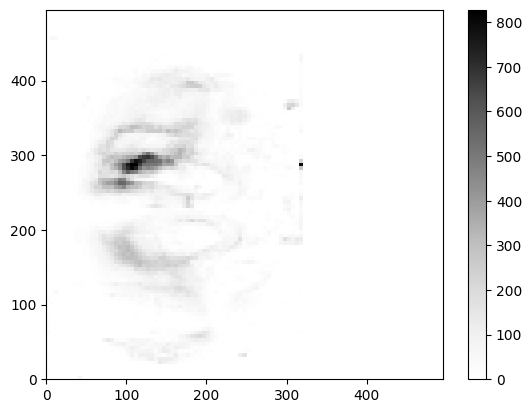

In [113]:
bin_egdes = np.arange(0,500,5)
plt.hist2d(cellLocs["445"][:,1], cellLocs["445"][:,2], bin_egdes, cmap="Greys")
plt.colorbar();

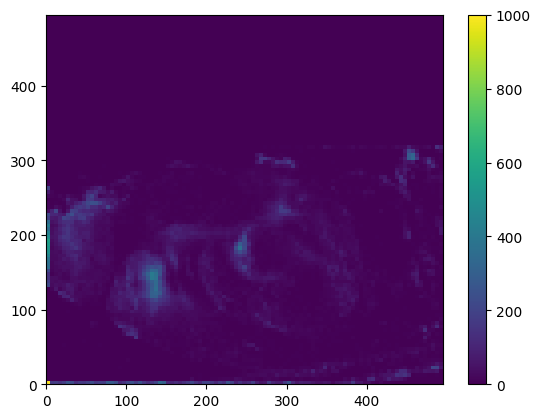

In [108]:
bin_egdes = np.arange(0,500,5)
plt.hist2d(cellLocs["561"][:,0], cellLocs["561"][:,1], bin_egdes, vmax=1000)
plt.colorbar();

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### Section 2: Quantify cell counts in each thalamic sub-region  
    
We can cross-reference the spatial coordinates of the detected cells in our dataset to the CCF reference brain atlas and identify which brain regions our cells are in. Here, we use brainglobe_atlasapi to import the Allen Mouse Brain Atlas (25um resolution) and identify the spatial bounds of our brain regions of interest. You can use the same approach to target other brain regions by acronym. More details on CCF and the brain region hierarchy here. (to do: point to CCF content. e.g.https://allenswdb.github.io/background/CCF.html?highlight=ccf ) 



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: I wonder if it's not too hard to plot a heatmap of the cells with some CCF boundaries superimposed to try to motivate the question a bit?

In [114]:
atlasapi.config.write_config_value('brainglobe_dir', '/data/.brainglobe') # points to allen mouse atlases pre-loaded in data folder 

atlas = BrainGlobeAtlas('allen_mouse_25um', check_latest = False) # load CCF mouse brain atlas, 25um resolution 


stack = atlas.get_structure_mask("TH")

In [129]:
stack.shape

(528, 320, 456)

In [119]:
np.where(stack>0)

(array([220, 221, 221, ..., 361, 362, 362]),
 array([196, 178, 178, ..., 154, 149, 149]),
 array([234, 217, 218, ..., 327, 128, 327]))

In [128]:
atlas.mesh_from_structure("TH")

<meshio mesh object>
  Number of points: 6593
  Number of cells:
    triangle: 13170
  Point data: obj:vn
  Cell data: obj:group_ids

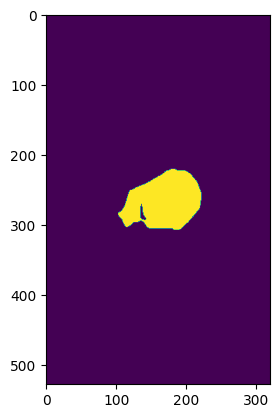

In [120]:
plt.imshow(stack[:,:,217])

In [ ]:
bin_egdes = np.arange(0,500,5)
plt.hist2d(cellLocs["561"][:,0], cellLocs["561"][:,1], bin_egdes, vmax=1000)
plt.colorbar();



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: These functions are wonky - parameter lists don't match the inputs and some are using global variables when they shouldn't.
    
`generate_region_mask`: Can we use the brainglobe mask function instead? Lean into existing tools rather than recreating them?
    
`mask_cells`: this function uses a roiMask that isn't passed into the function - so using a global variable. That's not good. 
    
I wrote a shorter way to do this below. The numbers are very slightly different so someone should check, but I think it is easier to parse

In [15]:
def generate_region_mask(atlas, roiList):     
    """
    Generates a boolean array of entire brain space, with brain region ROI's == True to generate spatial mask. 
    
    Parameters: 
    -----------
    roiList : list 
        List of brain region acronyms (e.g. ["MD, PT"])
        
    
    Returns: 
    --------
    roiMask : array
        Array the size of the CCF brain template. Spatial coordinates of brain region ROI's == True
        
    """ 
    idList = [atlas.structures[roi]['id'] for roi in roiList] # converts brain region acronym to CCF number id 
    counter = 0 

    for id in idList:
        if counter == 0:
            roiMask = atlas.get_structure_mask(id).astype('bool') 
            counter = counter + 1 

        else: 
            roiMask = np.logical_or.reduce([roiMask, atlas.get_structure_mask(id).astype('bool')]) # iterates through rois, converting each position in the mask to True if it falls within any region mask 
            counter = counter + 1

    roiMask[:, :, 0:220] = False # ignore left hemisphere (half width of ML axis is 228, can revisit exact cutoff)

    return roiMask  

def mask_cells(cellLocs_ch):
    """ 
    Truncates the array of cell locations to those within the brain region ROIs.
    
    Parameters: 
    -----------
    cellLocs_ch : array 
        Array of the detected cell locations in a single channel (e.g. cellLocs["561"])
        
    
    Returns: 
    --------
    maskCells : array 
        Array of detected cell locations within the brain region ROI's 
    """
    # grab the cell locations for a single channel 
    locCells = cellLocs_ch
    
    # check if cell index is within mask of requested ROIs
    cellInMask = np.zeros(len(locCells), dtype = 'bool')
    for i, pos in enumerate(locCells):
        cellInMask[i] = roiMask[pos[0], pos[1], pos[2]]

    maskCells = locCells[cellInMask] # apply brain region mask 
    
    return maskCells
    
def count_cells_by_region(maskCells, annot):
    """ 
    Counts the cells in each brain region. 
    
    Parameters: 
    -----------
    maskCells : array 
        Array of detected cell locations within the brain region ROI's  
    atlas : object 
        Allen Mouse Atlas object pulled using BrainGlobeAtlas 
        
        
    Returns: 
    --------
    String of cell counts in each brain region 
    """
    annot = atlas.annotation # creates an empty array the size of the brain volume 
    uniqVals, valCounts = np.unique(annot[maskCells[:,0], maskCells[:,1], maskCells[:,2]], return_counts=True)

    for count, name in enumerate(uniqVals):
         print(str(atlas.structures[name]['acronym']) + " " + str(valCounts[count]))



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

This section uses a set of functions to:  
1. create an array the size of the brain volume, with the brain regions of interest masked out 
2. get the cells within the brain regions 
3. count how many cells are in each region 

In [16]:
 roiList = ["MD","PT","IAD","PVT","IMD","CM","PCN","CL"] # list of thalamic sub-regions to target 
cellLocs_ch = cellLocs["561"] # cell locations within one imaging channel 
 
roiMask = generate_region_mask(atlas, roiList) 
maskCells = mask_cells(cellLocs_ch) 
count_cells_by_region(maskCells, atlas) 

PT 435
IMD 223
PVT 1411
MD 1045
CL 29
CM 303
PCN 9
IAD 460


In [17]:
## Alternate way to do this

atlasapi.config.write_config_value('brainglobe_dir', '/data/.brainglobe') # points to allen mouse atlases pre-loaded in data folder 

atlas = BrainGlobeAtlas('allen_mouse_25um', check_latest = False) # load CCF mouse brain atlas, 25um resolution 
roiList = ["MD","PT","IAD","PVT","IMD","CM","PCN","CL"] # list of thalamic sub-regions to target 
cellLocs_ch = cellLocs["561"] # cell locations within one imaging channel 

for roi in roiList:
    count=0
    for cell in cellLocs_ch:
        if atlas.structure_from_coords(cell, as_acronym=True)==roi: #do the cell coordinates map to the roi?
            count+=1
            
    print(roi, count)

MD 1047
PT 440
IAD 461
PVT 1413
IMD 223
CM 303
PCN 9
CL 29


In [148]:
count=0
for cell in cellLocs["561"]:
    if atlas.structure_from_coords(cell, as_acronym=True) in(roiList):
        count+=1

In [149]:
count

3925

In [91]:
maskCells.shape

(3915, 3)

In [93]:
cellLocs["561"].shape

(163794, 3)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### Section 4: How are targeted cells in the thalamus spatially organized?<br> 
    
We will use different plotting tools to assess the spatial organization of the cells in each region. 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: I think we need a little more motivation about what we're doing in each section. What question are we trying to answer and why?

In [85]:
pd.DataFrame(cellLocs['445'])

,0,1,2
0,1,1,76
1,1,1,76
2,1,1,72
3,1,1,73
4,1,1,74
...,...,...,...
249317,527,319,298
249318,527,319,296
249319,527,319,298
249320,527,319,299


In [76]:
# Restructures data to separate cells by brain region

annot = atlas.annotation 
uniqVals, valCounts = np.unique(annot[maskCells[:,0], maskCells[:,1], maskCells[:,2]], return_counts=True)
cellCCF = annot[maskCells[:,0], maskCells[:,1], maskCells[:,2]]
structDict = {}
for name in uniqVals:
    isStruct = cellCCF == name
    structDict[atlas.structures[name]['acronym']] = isStruct
    

In [77]:
structDict

{'PT': array([False, False, False, ..., False, False, False]),
 'IMD': array([False, False, False, ..., False, False, False]),
 'PVT': array([False, False, False, ..., False, False, False]),
 'MD': array([False, False, False, ..., False, False, False]),
 'CL': array([ True,  True,  True, ..., False, False, False]),
 'CM': array([False, False, False, ..., False, False, False]),
 'PCN': array([False, False, False, ..., False,  True,  True]),
 'IAD': array([False, False, False, ...,  True, False, False])}

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

to do: add some context here about the importance of anterior-posterior organization   
      
    

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: We still don't know which coordinate is the ap one. 

also, why are we multiplying the coordinate by 25 below? I assume this has to do with the atlas resolution? If so, what are the units of the coordinates that we get in cellLocs?

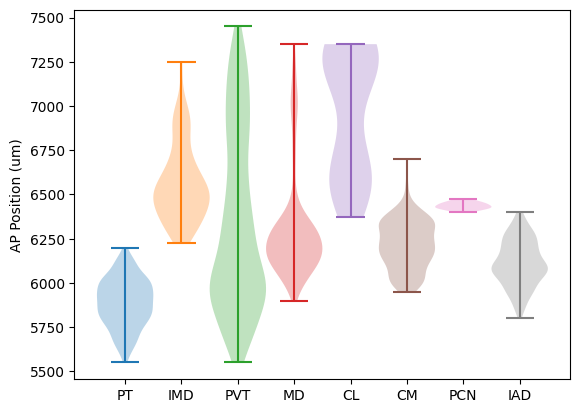

In [78]:
# Violin plots showing the spread of the cells across the anterior-posterior axis in each sub-region 

plt.figure()
a = 1
b = []
c = []
for key, val in structDict.items():
    plt.violinplot(maskCells[val,0]*25, positions=[a], widths = 1)
    b.extend([a])
    c.extend([key])
    a = a + 1
plt.ylabel("AP Position (um)")
plt.xticks(b,c);

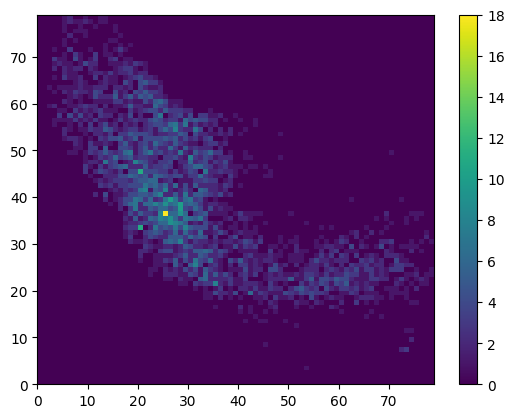

In [79]:
# Heatmap depicting 2D spatial histogram of cell locations 

# to do - what are axes labels? 

bin_egdes = np.arange(0,80,1)
plt.hist2d(maskCells[:,0]-220, maskCells[:,1]-120, bin_egdes)
plt.colorbar();

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: Ditto on axis labels. Also why the -220 and -120?

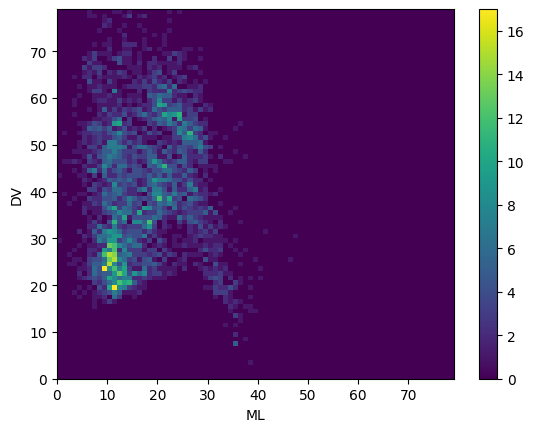

In [17]:
# Heatmap depicting 2D spatial histogram of cell locations 
bin_egdes = np.arange(0,80,1)
plt.hist2d(maskCells[:,2]-220, maskCells[:,1]-120, bin_egdes)
plt.colorbar()
plt.ylabel("DV")
plt.xlabel("ML");

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

   to do: need to add axes labels and add more context on this figure  


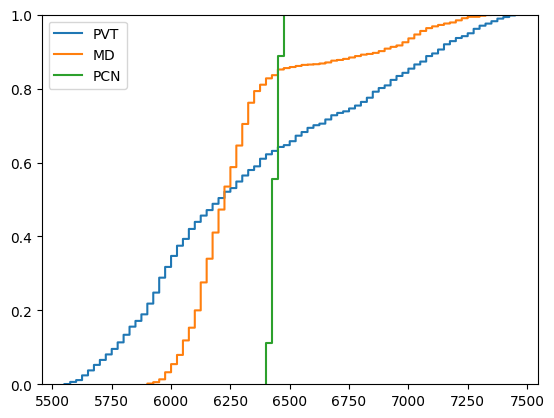

In [131]:
# Sort each cell into CCF structures

plt.ecdf(maskCells[structDict["PVT"],0]*25, label = "PVT")
plt.ecdf(maskCells[structDict["MD"],0]*25, label = "MD")
plt.ecdf(maskCells[structDict["PCN"],0]*25, label = "PCN")
plt.legend()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: What is this plot? cumulative histogram of AP coordinates in each region? If so, I'd put this plot up by the violin plots.
I think this section is missing a question. The point is that the cells in different structures are in different locations? But that's a given because they are in these different structures?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f69cf7; ">
SdV: Before we move to other datasets, isn't there something else to think about with this dataset? Like comparing the different channels? Comparing projections from different locations in cortex? I think it could help to motivate looking across datasets. So far it's just been can we label cells based on their coordinates, but why do we care about where these cells are located?

In [18]:

atlasapi.config.write_config_value('brainglobe_dir', '/data/.brainglobe') # points to allen mouse atlases pre-loaded in data folder 

atlas = BrainGlobeAtlas('allen_mouse_25um', check_latest = False) # load CCF mouse brain atlas, 25um resolution 
roiList = ["MD","PT","IAD","PVT","IMD","CM","PCN","CL"] # list of thalamic sub-regions to target 
cellLocs_ch = cellLocs["561"] # cell locations within one imaging channel 

for roi in roiList:
    count=0
    for cell in cellLocs_ch:
        if atlas.structure_from_coords(cell, as_acronym=True)==roi: #do the cell coordinates map to the roi?
            count+=1
    print(roi, count)

MD 1047
PT 440
IAD 461
PVT 1413
IMD 223
CM 303
PCN 9
CL 29


In [133]:

cellLocs_ch = cellLocs["445"] # cell locations within one imaging channel 

for roi in roiList:
    count=0
    for cell in cellLocs_ch:
        if atlas.structure_from_coords(cell, as_acronym=True)==roi: #do the cell coordinates map to the roi?
            count+=1
    print(roi, count)

MD 982
PT 7
IAD 2
PVT 190
IMD 79
CM 878
PCN 336
CL 2


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### Section 5: Import metadata and analyze multiple datasets<br>
    
Now, let's look at the data from multiple brains and channels. 

(to do: waiting until we can import metadata/qc information. for now, i've uploaded a few data assets to test the batch processing code) 

In [16]:
# ccfCoordDict = {685903: {'445': [171, 66, 284], '488': [162, 61, 248], '561': [157, 80, 267]},
#                 698035: {'445': [115, 120, 287], '488': [100, 127, 236], '561': [133, 133, 232]},
#                 689238: {'445': [126, 92, 259], '488': [127, 84, 271], '561': [122, 138, 237]},
#                 691387: {'445': [94, 117, 279], '488': [103, 124, 295], '561': [103, 131, 314]},
#                 691388: {'445': [107, 126, 259], '488': [99, 130, 274], '561': [102, 112, 238]},
#                 694512: {'445': [142, 101, 237], '488': [154, 75, 254], '561': [157, 89, 238]},
#                 695721: {'445': [107, 98, 255], '488': [144, 85, 258], '561': [129, 89, 254]},
#                 696668: {'561': [161, 82, 241]},
#                 684812: {'445': [166, 65, 197], '488': [166, 70, 265], '561': [167, 85, 240]},
#                 684821: {'488': [119, 100, 266], '561': [121, 98, 298]},
#                 689237: {'445': [139, 96, 244], '561': [140, 86, 295]},
#                 696669: {'445': [141, 87, 289], '561': [105, 113, 287]},
#                 693977: {'488': [154, 93, 268], '561': [93, 139, 240]},
#                 698927: {'488': [104, 128, 295], '561': [95, 117, 245]},
#                 698928: {'488': [146, 138, 232], '561': [145, 88, 271]},
#                 693979: {'488': [164, 91, 239], '561': [154, 95, 264]},
#                 693980: {'488': [120, 139, 293], '561': [115, 101, 286]},
#                 692909: {'561': [122, 132, 294]},
#                 692907: {'561': [115, 112, 244]},
#                 692912: {'561': [152, 131, 245]},
#                 692911: {'561': [123, 127, 294]},
#                 701750: {'561': [150, 142, 243]},
#                 701751: {'561': [105, 126, 284]},
#                 701754: {'561': [146, 80, 255]},
#                 721832: {'488': [120, 145, 306]}} #manually annotated, estimate injection site later

# virusDict = {685903:'AAVrg-XFP',
#              # 698034:'AAVrg',
#              698035:'AAVrg-XFP',
#              689238:'AAVrg-XFP',
#              691387:'AAVrg-XFP',
#              691388:'AAVrg-XFP',
#              694512:'AAVrg-XFP',
#              695721:'AAVrg-XFP',
#              696668:'AAVrg-XFP',
#              684812:'AAVrg-XFP',
#              684821:'AAVrg-XFP',
#              689237:'AAVrg-XFP',
#              696669:'AAVrg-XFP',
#              693977:"RabV-XFP",
#              698927:"RabV-XFP",
#              698928:"RabV-XFP",
#              693979:"RabV-XFP",
#              693980:"RabV-XFP",
#              692909:"AAVrg-Recombinase",
#              692907:"AAVrg-Recombinase",
#              692912:"AAVrg-Recombinase",
#              692911:"AAVrg-Recombinase",
#              685110:"AAVrg-Recombinase",
#              701750:"RabV-Recombinase",
#              701751:"RabV-Recombinase",
#              701754:"RabV-Recombinase",
#              721832:"AAVrg-XFP"
#             }

In [135]:
# suyee: placeholder until we get metadata/qc access. only working with a few data assets to test my code since i converted to using brainglobeatlas

ccfCoordDict = {698035: {'445': [115, 120, 287], '488': [100, 127, 236], '561': [133, 133, 232]},
                691388: {'445': [107, 126, 259], '488': [99, 130, 274], '561': [102, 112, 238]}} #manually annotated, estimate injection site later

virusDict = {698035:'AAVrg-XFP',
             691388:'AAVrg-XFP'}

In [136]:
# Define our mouse brain atlas and brain regions of interest again 

atlas = BrainGlobeAtlas('allen_mouse_25um', check_latest = False) # load CCF mouse brain atlas, 25um resolution 
roiList = ["MD","PT","IAD","PVT","IMD","CM","PCN","CL"] # list of thalamic sub-regions to target 

# iterate through all of the mouse IDs and grab the detected cell locations in each channel 

cellDict = {}
for sample in ccfCoordDict.keys():
    brainObj = load_data(sample, level=3)
    chList = list(brainObj.ccfCellsPaths.keys())
    cellLocs = brainObj.getCellsCCF(chList)
    
    for channel in ccfCoordDict[sample].keys():
        cellLocs_ch = cellLocs[channel]
        cellDict[str(sample) + " " + channel] = mask_cells(cellLocs_ch)
        

Loading data from ../data/SmartSPIM_698035_2023-10-24_18-38-40_stitched_2023-10-28_20-52-51/image_tile_fusing/OMEZarr
Found the following channels: ['445', '488', '561', '639']
Found cell segmentations in the following channels: ['445', '488', '561']
Found CCF aligned quantifications in the following channels: ['445', '488', '561']
Grabbing volumes for level: 3
Loading data from ../data/SmartSPIM_691388_2023-09-16_03-45-18_stitched_2023-09-20_23-25-37/image_tile_fusing/OMEZarr
Found the following channels: ['445', '488', '561', '639']
Found cell segmentations in the following channels: ['445', '488', '561']
Found CCF aligned quantifications in the following channels: ['445', '488', '561']
Grabbing volumes for level: 3


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Now, we have a dictionary that contains the cell locations for each channel imaged and processed for each mouse ID. 

In [21]:
for key, val in cellDict.items():
    print(key + ": " + str(len(val)))

698035 445: 2473
698035 488: 4380
698035 561: 3915
691388 445: 6785
691388 488: 4699
691388 561: 3656


In [38]:
# stopping here for now 

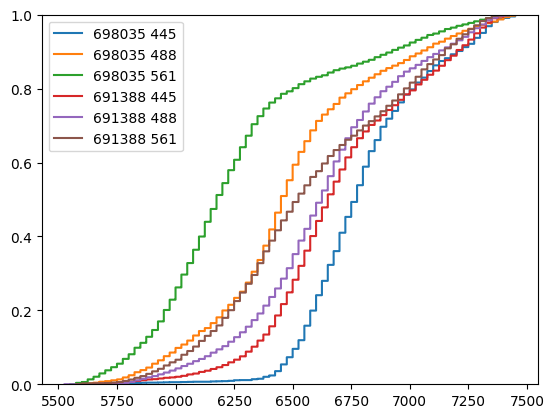

In [22]:
for key, val in cellDict.items():
    if len(val) > 100:
        plt.ecdf(val[:,0]*25, label = key)
plt.legend()

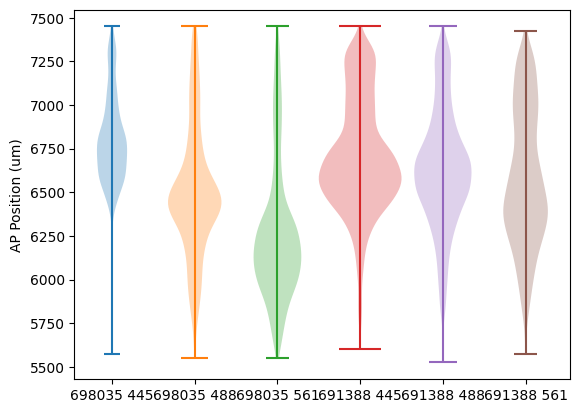

In [23]:
plt.figure()
a = 1
b = []
c = []
for key, val in cellDict.items():
    if len(val) > 800:
        plt.violinplot(val[:,0]*25, positions=[a], widths = len(val)/6785)
        b.extend([a])
        c.extend([key])
        a = a + 1
plt.ylabel("AP Position (um)")
plt.xticks(b,c);

In [ ]:
#reshape the cellDict w/ the cell locations into a pandas dataframe 

pd.DataFrame.from_dict(cellDict, orient = "index")

In [ ]:
cellDict["698035 561"].shape

In [ ]:
np.vstack(cellDict.values())

In [ ]:
stackCells = np.vstack(cellDict.values())
# stackCells = np.vstack((cellDict["689238 561"],cellDict["689238 488"]))
stepSize = 1
x_bin_edges = np.arange(0,50,stepSize)
y_bin_edges = np.arange(0,70,stepSize)
plt.hist2d(stackCells[:,2]-220, stackCells[:,1]-120, (x_bin_edges, y_bin_edges))
plt.gca().invert_yaxis()
plt.colorbar()
plt.ylabel("DV")
plt.xlabel("ML")
plt.savefig("../results/coronal hist.png",dpi=300)

In [ ]:
i = 2
expList = list(cellDict.keys())
stackCells = cellDict[expList[i]]
x_bin_edges = np.arange(0,50,stepSize)
y_bin_edges = np.arange(0,70,stepSize)
bin_egdes = np.arange(0,80,1)
plt.hist2d(stackCells[:,2]-220, stackCells[:,1]-120, (x_bin_edges, y_bin_edges))
plt.gca().invert_yaxis()
plt.colorbar()
plt.title(expList[i])
plt.ylabel("DV")
plt.xlabel("ML");
plt.savefig("../results/hist ex 3.png",dpi=300, transparent=True)

In [ ]:
stackCells = np.vstack(cellDict.values())
# stackCells = np.vstack((cellDict["689238 561"],cellDict["689238 488"]))
stepSize = 1
x_bin_edges = np.arange(0,50,stepSize)
y_bin_edges = np.arange(0,70,stepSize)
plt.hist2d(stackCells[:,2]-220, stackCells[:,1]-120, (x_bin_edges, y_bin_edges), cmap = 'viridis')
plt.gca().invert_yaxis()
# Set the color of the axes to white
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('white') 
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Set the color of the ticks to white
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

# set colorbar label plus label color
cb = plt.colorbar()
cb.set_label('Cell count', color='white')

# set colorbar tick color
cb.ax.yaxis.set_tick_params(color='white')

# set colorbar edgecolor 
cb.outline.set_edgecolor('white')

# set colorbar ticklabels
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='white')
plt.savefig("../results/coronal hist.png",dpi=300, transparent =True)

In [ ]:
stackCells = np.vstack(cellDict.values())
# stackCells = np.vstack((cellDict["689238 561"],cellDict["689238 488"]))
bin_egdes = np.arange(0,80,1)
plt.hist2d(stackCells[:,0]-220, stackCells[:,1]-120, bin_egdes, cmap = "viridis")
plt.gca().invert_yaxis()

# Set the color of the axes to white
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('white') 
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Set the color of the ticks to white
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

# set colorbar label plus label color
cb = plt.colorbar()
cb.set_label('Cell count', color='white')

# set colorbar tick color
cb.ax.yaxis.set_tick_params(color='white')

# set colorbar edgecolor 
cb.outline.set_edgecolor('white')

# set colorbar ticklabels
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='white')

plt.savefig("../results/sagittal hist.png",dpi=300, transparent=True)

In [ ]:
plt.figure(dpi=300)
bin_egdes = np.arange(0,80,1)
nExps = len(cellDict)
nRow = int(np.floor(np.sqrt(nExps)))
nCol = int(np.ceil(nExps / nRow))
for i, items in enumerate(cellDict.items(), 1):
    key, val = items
    plt.subplot(nRow,nCol,i)
    plt.hist2d(val[:,2]-220, val[:,1]-120, bin_egdes)
    plt.colorbar()
    plt.title(key)
    plt.ylabel("DV")
    plt.xlabel("ML")
    # plt.rc('font',**{"size": 3})
    plt.tight_layout();

## Try NMF

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
## Prepare data as an array of dictionaries
expList = list(cellDict.keys())
nExps = len(expList)
stepSize = 1
x_bin_edges = np.arange(0,50,stepSize)
y_bin_edges = np.arange(0,70,stepSize)
xLen = len(x_bin_edges)-1
yLen = len(y_bin_edges)-1
vectorSize = xLen*yLen # convert 2d array to vector
histArray = np.empty((nExps,vectorSize))
for i in range(nExps):
    stackCells = cellDict[expList[i]]
    a, xa, ya = np.histogram2d(stackCells[:,2]-220, stackCells[:,1]-120, (x_bin_edges, y_bin_edges)) # Coronal section
    # a, xa, ya = np.histogram2d(stackCells[:,0]-220, stackCells[:,1]-120, (x_bin_edges, y_bin_edges)) # Sagittal section
    histArray[i,:] = a.reshape(1,vectorSize)
# plt.imshow(a.T, origin='lower')

In [ ]:
i = 2
# plt.imshow(histArray[i,:].reshape((xLen,yLen)).T, origin = "lower")
plt.imshow(histArray[i,:].reshape((xLen,yLen)).T)

In [ ]:
model = NMF(n_components=5, init='random', random_state=0)
W = model.fit_transform(histArray)
H = model.components_

In [ ]:
i = 0
# plt.imshow(H[i,:].reshape((xLen,yLen)).T, origin = "lower")
plt.imshow(H[i,:].reshape((xLen,yLen)).T)

In [ ]:
for i in range(5):
    plt.figure()
    # plt.imshow(H[i,:].reshape((xLen,yLen)).T, origin = "lower")
    plt.imshow(H[i,:].reshape((xLen,yLen)).T)
    fn = "../results/component " + str(i) + ".svg"
    plt.savefig(fn,dpi=300)

In [ ]:
vars(model)

In [ ]:
W.shape

In [ ]:
plt.figure()
for i in range(W.shape[1]):
    label = "Component " + str(i)
    plt.plot(W[:,i],label=label)
plt.legend()

In [ ]:
wHeldOut = W
# wHeldOut[12,:] = 0
np.argmax(W[:,0])
list(cellDict.keys())[2]

In [ ]:
np.argmax(W[:,4])
list(cellDict.keys())[2]

In [ ]:
maxComponents = 20
modelErr = np.zeros(maxComponents-1)
norm = np.linalg.norm(histArray)
for i in range(1,maxComponents):
    model = NMF(n_components=i, init='random', random_state=0)
    W = model.fit_transform(histArray)
#     H = model.components_
    modelErr[i-1] = model.reconstruction_err_

In [ ]:
plt.plot(np.arange(1,20),modelErr,'o-')
plt.xticks(np.arange(0,21,5))
plt.ylabel("Reconstruction Error")
plt.xlabel("Num. Components")
plt.savefig("../results/NMF Reconstruction Error.svg",dpi=300)

In [ ]:
plt.figure()
for i in range(W.shape[1]):
    label = "Component " + str(i)
    plt.plot(W[:,i],label=label)
plt.legend()

## Construct dataframe for further analysis of NMF domains

In [ ]:
nComponents = 5
model = NMF(n_components=nComponents, init='random', random_state=0)
W = model.fit_transform(histArray)
H = model.components_

In [ ]:
sampleList = []
chList = []
for count, name in enumerate(expList):
    sampleList.append(np.int64(expList[count][0:6]))
    chList.append(expList[count][7:])
chList = np.array(chList)

In [ ]:
# to do: need to update components of this since switching to brainglobe 
# this will also change when loading metadata 

In [ ]:
# Format dataframe
ccfData = pd.DataFrame(ccfCoordDict).transpose()
ccfData.insert(0,"Sample",ccfData.index)
ccfData = ccfData.melt(id_vars="Sample", var_name = "Channel", value_name="CCF Coord")
ccfData = ccfData.dropna(axis = 0, how = "any")
# Re-establish index
ccfData.index = ccfData.Sample
ccfData = ccfData.drop(columns = "Sample")

# Add virus dictionary
ccfData.insert(2,"Virus",np.nan)
ccfData.insert(3,"Payload",np.nan)
ccfData.insert(4,"Capsid",np.nan)
for sample, virus in virusDict.items():
    ccfData.loc[sample,["Virus","Payload","Capsid"]] = [virus, virus.split('-')[1], virus.split('-')[0]]

# Get coordinates for projection
ccfCoords = np.array(list(ccfData["CCF Coord"]))

# Get CCF Structure
ccfData.insert(5,"CCF Struct",np.nan)
ccfData.insert(6,"CCF Parent",np.nan)
coordMap = structure_tree.get_structures_by_id(annot[ccfCoords[:,0],ccfCoords[:,1],ccfCoords[:,2]])
for count, structDict in enumerate(coordMap):
    ccfData["CCF Struct"].iloc[count] = structDict["acronym"]
    ccfData["CCF Parent"].iloc[count] = acronymMap[structDict["structure_id_path"][-2]] # get next level parent acronym
    
# Add factor contribution. ccfData order is different from expList due to melt operation.
# Trying to reconcile these here - may be more complicated than need be...
nExps = len(sampleList)
expIndx = np.empty(nExps, dtype = int)
for count, sample in enumerate(zip(ccfData.index, ccfData.Channel)):
    for i in range(nExps):
        if (sample[0] == sampleList[i]) & (sample[1] == chList[i]):
            expIndx[count] = i
            break

for i in range(nComponents):
    field = "Factor " + str(i)
    ccfData[field] = W[expIndx,i] / np.max(W[expIndx,i])

In [ ]:
W[expIndx,0]

In [ ]:
nExps = len(sampleList)
expIndx = np.empty(nExps, dtype = int)
for count, sample in enumerate(zip(ccfData.index, ccfData.Channel)):
    for i in range(nExps):
        if (sample[0] == sampleList[i]) & (sample[1] == chList[i]):
            expIndx[count] = i
            break
            # print(str(sampleList[i]) + ' ' + chList[i] + ' ' + str(i))
    # print(sample[1])

In [ ]:
expIndx

In [ ]:
ccfData.head(5)

In [ ]:
plt.figure()
for i in range(W.shape[1]):
    label = "Component " + str(i)
    plt.plot(W[:,i],label=label)
plt.legend()

In [ ]:
ccfData.head(5)

In [ ]:
i = 2
plt.figure(figsize = (12.8,4.8)) # size of 2 figures
plt.subplot(1,2,1)
plt.imshow(H[i,:].reshape((xLen,yLen)).T, cmap = "viridis")
plt.axis('tight')
plt.subplot(1,2,2)
field = "Factor " + str(i)
sns.stripplot(ccfData,x = "CCF Parent", y = field, color = "gray", order=["ACAd","PL","ILA","FRP","ORBm","ORBl","ORBvl","MOs","AId"], s = 7, jitter = .2)
# sns.despine()
plt.axis('tight');

## Try to add flatmap representations

In [ ]:
from pathlib import Path
from allensdk.core.reference_space_cache import ReferenceSpaceCache
import ccf_streamlines.projection as ccfproj
output_dir = '../scratch/'
# Establish reference space
reference_space_key = 'annotation/ccf_2017'
resolution = 25
rspc = ReferenceSpaceCache(resolution, reference_space_key, manifest=Path(output_dir) / 'manifest.json')
annot, annot_info = rspc.get_annotation_volume()
structure_tree= rspc.get_structure_tree()
rsp = rspc.get_reference_space()
# Set up CCF structure lookup dicts
idMap = structure_tree.get_id_acronym_map()
acronymMap = {IDs:acronym for acronym, IDs in idMap.items()} # invert idMap

In [ ]:
from allensdk.api import api
apiObj = api.Api("../results")
apiObj.retrieve_file_over_http("http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/cortical_coordinates/ccf_2017/ccf_streamlines_assets/view_lookup/flatmap_dorsal.h5","../scratch/flatmap_dorsal.h5")
apiObj.retrieve_file_over_http("http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/cortical_coordinates/ccf_2017/ccf_streamlines_assets/master_updated/labelDescription_ITKSNAPColor.txt","../scratch/labelDescription_ITKSNAPColor.txt")
apiObj.retrieve_file_over_http("http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/cortical_coordinates/ccf_2017/ccf_streamlines_assets/streamlines/closest_surface_voxel_lookup.h5","../scratch/closest_surface_voxel_lookup.h5")
apiObj.retrieve_file_over_http("http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/cortical_coordinates/ccf_2017/ccf_streamlines_assets/master_updated/flatmap_dorsal.nrrd","../scratch/flatmap_dorsal.nrrd")
apiObj.retrieve_file_over_http("http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/cortical_coordinates/ccf_2017/ccf_streamlines_assets/streamlines/surface_paths_10_v3.h5","../scratch/surface_paths_10_v3.h5")

In [ ]:
# Get flatmap boundaries
bf_boundary_finder = ccfproj.BoundaryFinder(
    projected_atlas_file="../scratch/flatmap_dorsal.nrrd",
    labels_file="../scratch/labelDescription_ITKSNAPColor.txt",
)

# And we can get the right hemisphere boundaries that match up with
# our projection if we specify the same configuration
bf_right_boundaries = bf_boundary_finder.region_boundaries(
    # we want the right hemisphere boundaries, but located in the right place
    # to plot both hemispheres at the same time
    hemisphere='right',

    # we also want the hemispheres to be adjacent
    view_space_for_other_hemisphere='flatmap_dorsal',
)

# Setup projector object
ccf_coord_proj = ccfproj.IsocortexCoordinateProjector(
    projection_file="../scratch/flatmap_dorsal.h5",
    surface_paths_file="../scratch/surface_paths_10_v3.h5",
    closest_surface_voxel_reference_file="../scratch/closest_surface_voxel_lookup.h5"
)

In [ ]:
# Project CCF coords onto flatmap
injCoords = ccfCoords*25 # convert from voxels to microns

# Project injection site onto dorsal flatmap
projCoords = ccf_coord_proj.project_coordinates(injCoords, scale='voxels', hemisphere = 'right', view_space_for_other_hemisphere="flatmap_dorsal")

# Add projections to dataframe
ccfData.insert(4,"ML",np.nan)
ccfData.insert(5,"AP",np.nan)
ccfData.insert(6,"DV",np.nan)
ccfData.loc[:,["ML","AP","DV"]] = projCoords

In [ ]:
for k, boundary_coords in bf_right_boundaries.items():
    plt.plot(*boundary_coords.T, color = 'k', lw= 2)

sns.scatterplot(ccfData,x = "ML", y = "AP",edgecolor = "none", hue = "Factor 2",zorder = 2, s =80, palette = "viridis")
plt.legend(loc = "upper right")

In [ ]:
i = 1
plt.figure(figsize = (12.8,4.8)) # size of 2 figures
plt.subplot(1,2,1)
plt.imshow(H[i,:].reshape((xLen,yLen)).T, cmap = "viridis")
plt.axis('tight')
plt.subplot(1,2,2)
field = "Factor " + str(i)
sns.stripplot(ccfData,x = "CCF Parent", y = field, color = "gray", order=["ACAd","PL","ILA","FRP","ORBm","ORBl","ORBvl","MOs","AId"], s = 7, jitter = .2)
# sns.despine()
plt.axis('tight');

In [ ]:
ccfData.sort_values("Factor 1", ascending=False)

In [ ]:
struct = "Factor 1"
plotData = ccfData.copy()
plt.figure(dpi=300)
for k, boundary_coords in bf_right_boundaries.items():
    plt.plot(*boundary_coords.T, color = 'k', lw= 2)

plotData = plotData.sort_values(by=struct,ascending=True) # sort for plotting largest value on top
ax = sns.scatterplot(plotData,x = "ML", y = "AP", s = 45, hue = struct, hue_norm=(0,1),
                     edgecolor = 'black', linewidth = 1, zorder = 2, palette = 'viridis')

norm = plt.Normalize(0, 1)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm = plt.cm.ScalarMappable(cmap="viridis")
plt.colorbar(sm, ax = ax)
ax.get_legend().remove()
plt.title(struct)
plt.savefig("../results/factor 1 flatmap.svg",dpi=300)

In [ ]:
for i in range(5):
    plt.figure()
    # plt.imshow(H[i,:].reshape((xLen,yLen)).T, origin = "lower")
    plt.imshow(H[i,:].reshape((xLen,yLen)).T)
    plt.title(i)

In [ ]:
from matplotlib.colors import Normalize, to_hex

In [ ]:

# rFactor = "Factor 0"
# gFactor = "Factor 1"
# bFactor = "Factor 2"

rFactor = "Factor 1"
gFactor = "Factor 0"
bFactor = "Factor 3"
plotData = ccfData.copy()
plt.figure(dpi=300)
for k, boundary_coords in bf_right_boundaries.items():
    plt.plot(*boundary_coords.T, color = 'k', lw= 2)

plotData['color'] = plotData.apply(lambda row: to_hex((row[rFactor], row[gFactor], row[bFactor])), axis=1)
palette = {color: color for color in plotData['color'].unique()}
plotData = plotData.sort_values(by='color',ascending=True) # sort for plotting largest value on top
ax = sns.scatterplot(plotData,x = "ML", y = "AP", s = 45, hue = "color",
                     edgecolor = 'black', linewidth = 1, zorder = 2, palette = palette)

ax.get_legend().remove()
plt.title(rFactor + " " + gFactor + " " + bFactor)
plt.savefig("../results/joint factors flatmap.svg",dpi=300)

In [ ]:

# rFactor = "Factor 0"
# gFactor = "Factor 1"
# bFactor = "Factor 2"

rFactor = "Factor 1"
gFactor = "Factor 0"
bFactor = "Factor 2"
plotData = ccfData.copy()
plt.figure(dpi=300)
for k, boundary_coords in bf_right_boundaries.items():
    plt.plot(*boundary_coords.T, color = 'k', lw= 2)

plotData['color'] = plotData.apply(lambda row: to_hex((row[rFactor], row[gFactor], row[bFactor])), axis=1)
palette = {color: color for color in plotData['color'].unique()}
plotData = plotData.sort_values(by='color',ascending=True) # sort for plotting largest value on top
ax = sns.scatterplot(plotData,x = "ML", y = "AP", s = 45, hue = "color",
                     edgecolor = 'black', linewidth = 1, zorder = 2, palette = palette)

ax.get_legend().remove()
plt.title(rFactor + " " + gFactor + " " + bFactor)
# plt.savefig("../results/joint factors flatmap.svg",dpi=300)

In [ ]:
# Create RGB colors and convert them to hex
plotData['color'] = plotData.apply(lambda row: to_hex((row['Factor 0'], row['Factor 1'], row['Factor 2'])), axis=1)
# Create a color palette dictionary
palette = {color: color for color in plotData['color'].unique()}
# sns.scatterplot(data=X, x='posX', y='posY', hue='color', palette=X['color'].unique(), legend=False, s=100)

In [ ]:
ccfData.sort_values("Factor 1", ascending=False).head(5)

In [ ]:
lookFor = "698927 488"
for i, name in enumerate(expList):
    if name == lookFor:
        print(name)
        print(i)
        break

In [ ]:
i = 33
plt.imshow(histArray[i,:].reshape((xLen,yLen)).T)

In [ ]:
i = 4
showName = 2
field = "Factor " + str(i)
sns.stripplot(ccfData,x = "CCF Parent", y = field, color = "white", order=["ACAd","PL","ILA","FRP","ORBm","ORBl","ORBvl","MOs","AId"], s = 7, jitter = .2)
sns.despine()
plt.ylabel("Factor " + str(showName), color = "white")
plt.xlabel('Injection Site', color='white')
plt.axis('tight');

# Set the color of the axes to white
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('white') 
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Set the color of the ticks to white
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')


# Set the color of the axis labels to white
# plt.xlabel('X Axis', color='white')
# plt.ylabel('Y Axis', color='white')

plt.savefig("../results/input " + str(showName) + ".svg", dpi = 300, transparent=True)